In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#Data Preprocessing

In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/dataset/train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'ship': 0, 'truck': 1}
['ship', 'truck']
[0, 1]


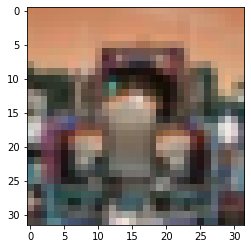

In [ ]:
import matplotlib.pyplot as plt


img_size=32

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        resized=cv2.resize(img,(img_size,img_size))
        plt.imshow(img)
        break

In [ ]:
img_size=32
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import random
random.shuffle(data)

In [ ]:
target[7]

0

In [ ]:
data[7]

array([[[196, 162, 118],
        [196, 162, 118],
        [196, 161, 117],
        ...,
        [195, 154, 111],
        [197, 156, 113],
        [198, 158, 115]],

       [[200, 165, 120],
        [200, 165, 120],
        [202, 167, 123],
        ...,
        [197, 155, 112],
        [199, 156, 113],
        [197, 157, 113]],

       [[199, 164, 120],
        [199, 164, 121],
        [202, 167, 124],
        ...,
        [198, 156, 113],
        [200, 158, 115],
        [200, 160, 116]],

       ...,

       [[ 90, 186, 192],
        [ 88, 184, 190],
        [ 86, 183, 189],
        ...,
        [190, 160, 159],
        [204, 176, 162],
        [208, 183, 154]],

       [[ 87, 185, 191],
        [ 86, 182, 188],
        [ 87, 182, 188],
        ...,
        [200, 172, 159],
        [209, 183, 159],
        [209, 185, 150]],

       [[ 81, 177, 183],
        [ 81, 174, 180],
        [ 81, 172, 179],
        ...,
        [196, 176, 136],
        [203, 182, 136],
        [207, 186, 139]]

#Recale and assign  catagorical lables

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [ ]:
new_target.shape

(10010, 2)

#CNN Model

In [ ]:
data.shape

(10010, 32, 32, 3)

In [ ]:
data.shape[1:]

(32, 32, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 200)       5600      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)             

#Splittiong data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

(9009, 32, 32, 3)

In [ ]:
train_target.shape

(9009, 2)

In [ ]:
test_data.shape

(1001, 32, 32, 3)

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=100,validation_split=0.2)


Train on 7207 samples, validate on 1802 samples
Epoch 1/100
7207/7207 [==============================] - 9s 1ms/step - loss: 0.4627 - accuracy: 0.7704 - val_loss: 0.5520 - val_accuracy: 0.7431
Epoch 2/100
7207/7207 [==============================] - 2s 219us/step - loss: 0.3112 - accuracy: 0.8707 - val_loss: 0.2475 - val_accuracy: 0.8946
Epoch 3/100
7207/7207 [==============================] - 2s 220us/step - loss: 0.2681 - accuracy: 0.8927 - val_loss: 0.2559 - val_accuracy: 0.8879
Epoch 4/100
7207/7207 [==============================] - 2s 216us/step - loss: 0.2432 - accuracy: 0.9030 - val_loss: 0.1968 - val_accuracy: 0.9240
Epoch 5/100
7207/7207 [==============================] - 2s 217us/step - loss: 0.2335 - accuracy: 0.9041 - val_loss: 0.2586 - val_accuracy: 0.8851
Epoch 6/100
7207/7207 [==============================] - 2s 215us/step - loss: 0.2121 - accuracy: 0.9170 - val_loss: 0.2178 - val_accuracy: 0.9229
Epoch 7/100
7207/7207 [==============================] - 2s 215us/step 

In [ ]:
model.save('model 9.h5')

In [ ]:
from matplotlib import pyplot as plt

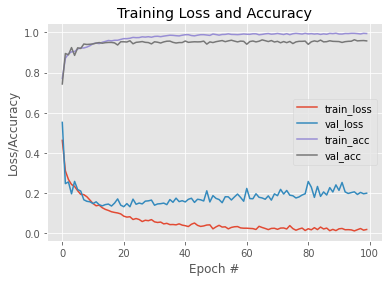

In [ ]:
# plot the training loss and accuracy
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model9")